In [1]:
import configparser
config = configparser.RawConfigParser()
config.read("../api_key.ini")

import cohere
API_KEY = config[config.sections()[0]]['api_key']
co = cohere.Client(API_KEY)

### Load Data

In [2]:
import pandas as pd
# Load data to pandas dataframes:
sales_by_day = pd.read_csv('../data/raw/LastWeekSalesByDay.csv', delimiter=';')
top_customers = pd.read_csv('../data/raw/LastWeekTopCustomers.csv', delimiter=';')
top_products = pd.read_csv('../data/raw/LastWeekTopProducts.csv', delimiter=';')
order_statistics = pd.read_csv('../data/raw/LastWeekOrderStatistics.csv', delimiter=';')
cash_flow_report = pd.read_csv('../data/raw/CashFlowReport.csv', delimiter=';')
understocked_products = pd.read_csv('../data/raw/UnderstockedProducts.csv', delimiter=';')

### Products

In [3]:
import csv

# Initialize an empty dictionary to store the data
product_revenue = {}

# Read the CSV file and populate the dictionary
with open('../data/raw/LastWeekTopProducts.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        product_description = row['Product Description']
        revenue = int(row['Revenue'])
        product_revenue[product_description] = revenue

# Print the dictionary to verify
print(product_revenue)


{'Selmer Paris Reference 54 Alto': 409500, 'Keilwerth SX90R': 264000, 'Roland Fantom-8': 248500, 'Tama Starclassic Bubinga 5-Piece Shell Pack': 245000, 'Music Man John Petrucci Majesty': 240000, 'Nord Stage 3 Compact': 227500, 'Nord Stage 3 88': 225000, 'Bach 180S37 Stradivarius Series Bb Trumpet': 224000, 'Yanagisawa AWO10 Alto Sax': 216000, 'Roland RD-2000': 207500, 'Korg Kronos 88': 192000, 'Gibson Les Paul Standard': 177500, 'P. Mauriat PMXA-67R Alto Sax': 177000, 'Korg Grandstage 88': 176000, 'Sonor SQ1 3-Piece Shell Pack': 173600, 'Behringer X32 Digital Mixer': 158400, 'Dave Smith Instruments OB-6': 156000, 'Yamaha Montage 8': 156000, 'Music Man StingRay 5 HH': 154000, 'Allen & Heath QU-16C Digital Mixer': 151300, 'Ludwig Vistalite John Bonham Zep Set': 147200, 'Sequential Prophet-6': 142800, 'Martin D-28 Dreadnought Acoustic Guitar': 138000, 'Selmer SAS280 La Voix II': 132000, 'Cannonball Big Bell Stone Series': 130000, 'Bose L1 Pro16 Portable Line Array System': 127800, 'Teenag

Customers

In [4]:
import csv

# Initialize an empty dictionary to store the data
customer_revenue = {}

# Read the CSV file and populate the dictionary
with open('../data/raw/LastWeekTopCustomers.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        customer_name = row['Customer Name']
        revenue = int(row['Revenue'])
        customer_revenue[customer_name] = revenue

# Print the dictionary to verify
print(customer_revenue)


{'Web Site': 284790, 'Crescendo Corner Ltd.': 277990, 'Symphony Supplies Inc.': 272393, 'Tempo Treasures Ltd.': 252129, 'Symphony Shop Ltd.': 245906, 'Serenade Showroom Ltd.': 231169, 'Crescendo Crafts Inc.': 212580, 'Virtuoso Ventures Inc.': 203830, 'Crescendo Collection Inc.': 194755, 'MeloTune Traders Ltd.': 193031, 'Melody Merchants Ltd.': 192870, 'Harmony Haven Inc.': 189110, 'Virtuoso Varieties Ltd.': 176230, 'Symphony Select Ltd.': 174708, 'Acoustic Avenues Ltd.': 166390, 'Crescendo Cornerstone Inc.': 164590, 'Serenade Selection Inc.': 162580, 'Rhythmic Realm Inc.': 162525, 'Melody Magic Inc.': 162230, 'Virtuoso Ventures Ltd.': 159150, 'Allegro Arcade Inc.': 158486, 'Echo Emporium Ltd.': 156874, 'Symphony Stockpile Ltd.': 155492, 'MelodyWorks LLC': 155410, 'Rhythmic Harmony Inc.': 154730, 'Virtuoso Village Ltd.': 154512, 'Crescendo Instruments Ltd.': 153120, 'Tempo Trinkets Ltd.': 149590, 'Serenade Selection Ltd.': 148450, 'Melody Market Ltd.': 147060, 'Allegro Avenue Ltd.': 144

### Sales By Day

In [5]:
import csv

# Initialize an empty dictionary to store the data
revenue_data = {}

# Read the CSV file and populate the dictionary
with open('../data/raw/LastWeekSalesByDay.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        date = row['Date']
        product_category = row['Product category']
        revenue = int(row['Revenue'])
        
        # If the product category already exists in the dictionary, update its revenue
        if product_category in revenue_data:
            revenue_data[product_category][date] = revenue
        # If the product category is new, add it to the dictionary with its revenue for the current date
        else:
            revenue_data[product_category] = {date: revenue}

# Print the dictionary to verify
print(revenue_data)


{'Acoustic Drums': {'15/04/2024': 195870, '16/04/2024': 149440, '17/04/2024': 123730, '18/04/2024': 213170, '19/04/2024': 115150, '20/04/2024': 222600}, 'Acoustic Guitars': {'15/04/2024': 90500, '16/04/2024': 130000, '17/04/2024': 77650, '18/04/2024': 65300, '19/04/2024': 73850, '20/04/2024': 45750}, 'Audio Interfaces': {'15/04/2024': 18100, '16/04/2024': 31470, '17/04/2024': 22300, '18/04/2024': 16260, '19/04/2024': 24900, '20/04/2024': 26700}, 'Bass Guitars': {'15/04/2024': 100150, '16/04/2024': 107050, '17/04/2024': 101250, '18/04/2024': 137100, '19/04/2024': 118900, '20/04/2024': 69950}, 'Classical Guitars': {'15/04/2024': 48280, '16/04/2024': 46540, '17/04/2024': 50250, '18/04/2024': 26830, '19/04/2024': 30230, '20/04/2024': 56120}, 'Digital Pianos': {'15/04/2024': 151500, '16/04/2024': 114350, '17/04/2024': 174950, '18/04/2024': 116050, '19/04/2024': 145600, '20/04/2024': 169400}, 'DJ Equipment': {'15/04/2024': 72450, '16/04/2024': 108500, '17/04/2024': 129250, '18/04/2024': 6385

### Order Statistics

In [6]:
import csv

# Initialize an empty dictionary to store the data
channel_orders = {}

# Read the CSV file and populate the dictionary
with open('../data/raw/LastWeekOrderStatistics.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        channel = row['Channel']
        orders_count = int(row['Orders Count'])
        order_lines = int(row['Order Lines'])
        quantity_pieces = int(row['Quantity in pieces'])
        quantity_boxes = int(row['Quantity in boxes'])
        amount = int(row['Amount'])
        fulfillment_percentage = int(row['Percentage of fulfillment'])
        
        # Store the data in the dictionary
        channel_orders[channel] = {
            'Orders Count': orders_count,
            'Order Lines': order_lines,
            'Quantity in pieces': quantity_pieces,
            'Quantity in boxes': quantity_boxes,
            'Amount': amount,
            'Percentage of fulfillment': fulfillment_percentage
        }

# Print the dictionary to verify
print(channel_orders)


{'Online Retailers': {'Orders Count': 520, 'Order Lines': 3683, 'Quantity in pieces': 5160, 'Quantity in boxes': 746, 'Amount': 3642673, 'Percentage of fulfillment': 98}, 'Retail Stores': {'Orders Count': 1170, 'Order Lines': 4150, 'Quantity in pieces': 4632, 'Quantity in boxes': 667, 'Amount': 3513708, 'Percentage of fulfillment': 97}, 'Web Site': {'Orders Count': 270, 'Order Lines': 350, 'Quantity in pieces': 396, 'Quantity in boxes': 56, 'Amount': 284790, 'Percentage of fulfillment': 99}, 'Wholesalers': {'Orders Count': 355, 'Order Lines': 5100, 'Quantity in pieces': 6783, 'Quantity in boxes': 956, 'Amount': 5328397, 'Percentage of fulfillment': 96}}


### Cashflow report

In [7]:
import csv

# Initialize an empty dictionary to store the data
financial_data = {}

# Read the CSV file and populate the dictionary
with open('../data/raw/CashFlowReport.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        debit = int(row['Debit'])
        credit = int(row['Credit'])
        balance = int(row['Balance'])
        inflows_forecast = int(row['Inflows Forecast'])
        outflows_forecast = int(row['Outflows Forecast'])
        projected_balance = int(row['Projected Balance'])
        
        # Store the data in the dictionary
        financial_data['Debit'] = debit
        financial_data['Credit'] = credit
        financial_data['Balance'] = balance
        financial_data['Inflows Forecast'] = inflows_forecast
        financial_data['Outflows Forecast'] = outflows_forecast
        financial_data['Projected Balance'] = projected_balance

# Print the dictionary to verify
print(financial_data)

{'Debit': 300000, 'Credit': 450000, 'Balance': 150000, 'Inflows Forecast': 15000000, 'Outflows Forecast': 9000000, 'Projected Balance': 23850000}


### Understocked Products

In [8]:
import csv

# Initialize an empty dictionary to store the data
understocked_product_data = {}

# Read the CSV file and populate the dictionary
with open('../data/raw/UnderstockedProducts.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        product_description = row['Product Description']
        minimum_stock = int(row['Minimum stock'])
        current_stock = int(row['Current stock'])
        expected_qty = int(row['Expected Qty'])
        required_stock = int(row['Required stock'])
        
        # Store the data in the dictionary
        understocked_product_data[product_description] = {
            'Minimum stock': minimum_stock,
            'Current stock': current_stock,
            'Expected Qty': expected_qty,
            'Required stock': required_stock
        }

# Print the dictionary to verify
print(understocked_product_data)


{'Apple GarageBand': {'Minimum stock': 8, 'Current stock': 3, 'Expected Qty': 15, 'Required stock': 1}, 'Aquila New Nylgut Soprano Ukulele Strings': {'Minimum stock': 5, 'Current stock': 1, 'Expected Qty': 13, 'Required stock': 0}, 'Bosendorfer Imperial Grand Piano': {'Minimum stock': 9, 'Current stock': 0, 'Expected Qty': 10, 'Required stock': 0}, 'Casio CDP-S150 Compact Digital Piano': {'Minimum stock': 7, 'Current stock': 2, 'Expected Qty': 18, 'Required stock': 0}, 'EastTop T008K': {'Minimum stock': 6, 'Current stock': 2, 'Expected Qty': 1, 'Required stock': 1}, 'Fazioli F212 Grand Piano': {'Minimum stock': 9, 'Current stock': 0, 'Expected Qty': 15, 'Required stock': 1}, 'Fender Blues Deluxe Harmonica': {'Minimum stock': 8, 'Current stock': 3, 'Expected Qty': 7, 'Required stock': 0}, 'Kalani Kal 200 Soprano Ukulele': {'Minimum stock': 7, 'Current stock': 1, 'Expected Qty': 0, 'Required stock': 1}, 'Kawai K-300': {'Minimum stock': 7, 'Current stock': 3, 'Expected Qty': 8, 'Required 

### Functions

#### Functions on Products

In [9]:
def calculate_total_product_revenue():
    total_revenue = sum(product_revenue.values())
    return {
        'revenue': total_revenue,
        'summary': f"The total revenue from the top products is {total_revenue} euros."
    }   

In [10]:
def get_total_revenue_for_category(category):
    category_revenue = format(sum(revenue_data[category].values()), '.2f')
    return {'revenue_for_category': category_revenue, 
            'summary': f"The total revenue for the category {category} is {category_revenue}."
    }

# print(get_total_revenue_for_category('Acoustic Drums'))

In [11]:
def calculate_average_product_revenue():
    total_revenue = sum(product_revenue.values())
    num_products = len(product_revenue)
    average_revenue = total_revenue / num_products
    return {
        'average_revenue': round(average_revenue, 2),
        'summary': f"The average revenue per product is {average_revenue} euros."
    }

In [12]:
def retrieve_top_k_products(k):
    # Sort product_revenue dictionary by values (revenue) in descending order
    sorted_products = sorted(product_revenue.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top k products
    top_k_products = [product for product, revenue in sorted_products[:k]]
    
    return {
        'top_products': top_k_products,
        'summary': f"The top {k} products based on revenue are: {', '.join(top_k_products)}."
    }


In [13]:
def retrieve_least_k_products(k):
    # Sort product_revenue dictionary by values (revenue) in ascending order
    sorted_products = sorted(product_revenue.items(), key=lambda x: x[1])
    
    # Extract the least k products
    least_k_products = [product for product, revenue in sorted_products[:k]]
    
    return {
        'least_products': least_k_products,
        'summary': f"The least {k} products based on revenue are: {', '.join(least_k_products)}."
    }

#### Functions on Customer

In [14]:
def calculate_total_customer_revenue():
    total_revenue = sum(customer_revenue.values())
    return {
        'revenue': total_revenue,
        'summary': f"The total revenue from the top customers is {total_revenue} euros."
    }  

In [15]:
def get_total_revenue_for_customer(customer_name):
    revenue = customer_revenue.get(customer_name, 0)
    return {
        'revenue': revenue,
        'summary': f"The revenue from customer {customer_name} is {revenue} euros."
    }

print(get_total_revenue_for_customer('Harmony Hideout Ltd.'))

{'revenue': 143095, 'summary': 'The revenue from customer Harmony Hideout Ltd. is 143095 euros.'}


In [16]:
def calculate_average_customer_revenue():
    total_revenue = sum(customer_revenue.values())
    num_customers = len(customer_revenue)
    average_revenue = total_revenue / num_customers
    return {
        'average_revenue': round(average_revenue, 2),
        'summary': f"The average revenue per customer is {average_revenue} euros."
    }

In [17]:
def retrieve_top_k_customers(k):
    # Sort customer_revenue dictionary by values (revenue) in descending order
    sorted_customers = sorted(customer_revenue.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top k customers
    top_k_customers = [customer for customer, revenue in sorted_customers[:k]]
    
    return {
        'top_customers': top_k_customers,
        'summary': f"The top {k} customers based on revenue are: {', '.join(top_k_customers)}."
    }

In [18]:
def retrieve_least_k_customers(k):
    # Sort customer_revenue dictionary by values (revenue) in ascending order
    sorted_customers = sorted(customer_revenue.items(), key=lambda x: x[1])
    
    # Extract the least k customers
    least_k_customers = [customer for customer, revenue in sorted_customers[:k]]
    
    return {
        'least_customers': least_k_customers,
        'summary': f"The least {k} customers based on revenue are: {', '.join(least_k_customers)}."
    }

In [33]:
import seaborn as sns

def visualize_revenue_per_cust(k):
    # Sort customer_revenue dictionary by values (revenue) in descending order
    sorted_customers = sorted(customer_revenue.items(), key=lambda x: x[1], reverse=True)
    
    # Extract the top k customers
    top_k_customers = dict(sorted_customers[:k])
    
    # Plotting the top k customers with customers on y-axis and numbers on x-axis
    plot = sns.barplot(x=list(top_k_customers.values()), y=list(top_k_customers.keys()))
    plot.set_ylabel("Customer")  # Set y-axis label
    plot.set_xlabel("Revenue")   # Set x-axis label
    
    return {
        'plot': plot
    }


{'plot': <AxesSubplot: xlabel='Revenue', ylabel='Customer'>}

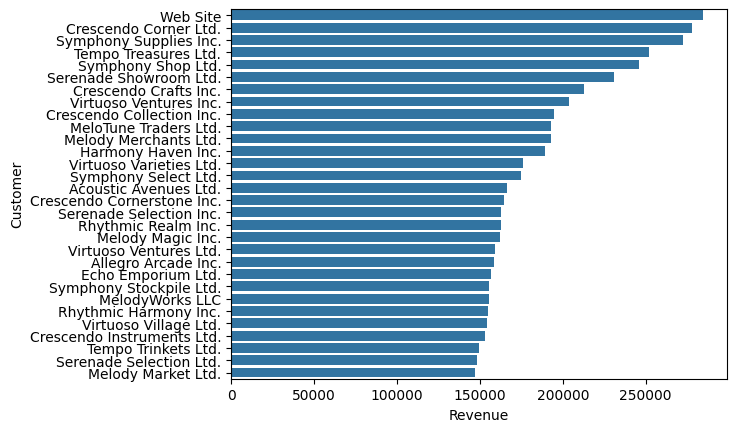

In [20]:
# visualize_revenue_per_cust(30)

### Functions on Cash Flow

In [21]:
def get_balance():
    return {'balance': financial_data['Balance'], 'summary': f"The balance is {balance}."}

def get_projected_balance():
    return {'projected_balance': financial_data['Projected Balance'], 'summary': f"The projected balance is {projected_balance}."}

def get_total_inflows():
    return {'total_inflows': financial_data['Inflows Forecast'], 'summary': f"The total inflows are {inflows_forecast}."}

def get_total_outflows():
    return {'total_outflows': financial_data['Outflows Forecast'], 'summary': f"The total outflows are {outflows_forecast}."}

def get_flows_difference():
    return {'flows_difference': financial_data['Inflows Forecast'] - financial_data['Outflows Forecast'], 'summary': f"The difference between inflows and outflows is {inflows_forecast - outflows_forecast}."}

def get_credit():
    return {'credit': financial_data['Credit'], 'summary': f"The credit is {credit}."}

def get_debit():
    return {'debit': financial_data['Debit'], 'summary': f"The debit is {debit}."}

def get_balance_loss():
    return {'balance_loss': financial_data['Debit'] - financial_data['Credit'], 'summary': f"The balance loss is {debit - credit}."}

def get_projected_balance_loss():
    diff = financial_data['Projected Balance'] - financial_data['Balance']
    if diff > 0:
        return {'projected_balance_loss': diff, 'summary': f"The projected balance is {diff} euros higher than the current balance."}
    elif diff < 0:
        return {'projected_balance_loss': diff, 'summary': f"The projected balance is {diff} euros lower than the current balance."}
    else:
        return {'projected_balance_loss': diff, 'summary': f"The projected balance is the same as the current balance."}

### Functions on Order Statistics

In [22]:
def get_channel_orders(channel):
    return {'channel_orders': channel_orders[channel], 'summary': f"The order statistics for the channel {channel} are {channel_orders[channel]}."}

def percentage_fulfilled(channel):
    return {'percentage_fulfilled': channel_orders[channel]['Percentage of fulfillment'], 'summary': f"The percentage of fulfillment for the channel {channel} is {channel_orders[channel]['Percentage of fulfillment']}."}

def get_orders_count(channel):
    return {'orders_count': channel_orders[channel]['Orders Count'], 'summary': f"The number of orders for the channel {channel} is {channel_orders[channel]['Orders Count']}."}

def highest_amount_channel():
    max_amount = 0
    max_channel = None
    for channel, data in channel_orders.items():
        if data['Amount'] > max_amount:
            max_amount = data['Amount']
            max_channel = channel
    return {'highest_amount_channel': max_channel, 'summary': f"The channel with the highest amount is {max_channel}."}

def calculate_average_order_values():
    total_revenue = channel_orders.get('Online Retailers')['Amount'] + channel_orders.get('Web Site')['Amount']
    total_orders = channel_orders.get('Online Retailers')['Orders Count'] + channel_orders.get('Web Site')['Orders Count']

    aov = total_revenue / total_orders
    return {
        'average_order_value': aov,
        'summary': f"The average order value is {aov:.2f}"}

### Function on Understocked Products

In [23]:
def get_understocked_products():
    understocked_products = ", ".join(list(understocked_product_data.keys()))
    return {'understocked_products': understocked_products, 'summary': "The products that need restocking are " + understocked_products + "."}
# print(get_understocked_products())

def get_total_expected_orders():
    expected_orders = sum([data['Expected Qty'] for data in understocked_product_data.values()])
    return {'expected_orders': expected_orders, 'summary': f"The expected total number of orders is {expected_orders}."}
# print(get_total_expected_orders())

def get_current_stock(product):
    return {'current_stock': understocked_product_data[product]['Current stock'], 'summary': f"The current stock for {product} is {understocked_product_data[product]['Current stock']}."}
# print(get_current_stock('Apple GarageBand'))

def most_understock_product():
    min_required_stock = float('inf')
    most_understocked_product = None
    for product, data in understocked_product_data.items():
        if data['Current stock'] < min_required_stock:
            min_required_stock = data['Required stock']
            max_understocked_product = product
    return {'most_understocked_product': max_understocked_product, 'summary': f"The product with the lowest stock is {max_understocked_product} with stock {understocked_product_data[max_understocked_product]['Current stock']}."}
# print(most_understock_product())

### Function Map

In [24]:
functions_map = {
    # Product functions
    "calculate_total_product_revenue": calculate_total_product_revenue,
    "get_total_revenue_for_category": get_total_revenue_for_category,
    "calculate_average_product_revenue" : calculate_average_product_revenue,
    "retrieve_top_k_products": retrieve_top_k_products,
    "retrieve_least_k_products": retrieve_least_k_products,

    # Customer functions
    "calculate_total_customer_revenue": calculate_total_customer_revenue,
    "get_total_revenue_for_customer": get_total_revenue_for_customer,
    "calculate_average_customer_revenue": calculate_average_customer_revenue,
    "retrieve_top_k_customers": retrieve_top_k_customers,
    "retrieve_least_k_customers": retrieve_least_k_customers,
    # temp
    "visualize_revenue_per_cust": visualize_revenue_per_cust,

    # Cash flow functions
    "get_total_inflows": get_total_inflows,
    "get_total_outflows": get_total_outflows,
    "get_flows_difference": get_flows_difference,
    "get_credit": get_credit,
    "get_debit": get_debit,
    "get_balance_loss": get_balance_loss,
    "get_projected_balance_loss": get_projected_balance_loss,
    "get_balance": get_balance,
    "get_projected_balance": get_projected_balance,

    # Order statistics functions
    "get_channel_orders": get_channel_orders,
    "percentage_fulfilled": percentage_fulfilled,
    "get_orders_count": get_orders_count,
    "highest_amount_channel": highest_amount_channel,
    "calculate_average_order_values":calculate_average_order_values,

    # Understocked products functions
    "get_understocked_products": get_understocked_products,
    "get_total_expected_orders": get_total_expected_orders,
    "get_current_stock": get_current_stock,
    "most_understocked_product": most_understock_product,
}

### Tools

In [52]:
tools = [
    # Product tools
    {
        "name": "calculate_total_product_revenue",
        "description": "Calculate the total revenue from the top products.",
        "parameter_definitions": {}
    },
    {
        "name": "get_total_revenue_for_category",
        "description": "Get the revenue data for a specific product category.",
        "parameter_definitions": {
            "category": {
                "description": "The product category for which to get the revenue data.",
                "type": "str",
                "required": True
            }
        }
    },
    {
        "name": "calculate_average_product_revenue",
        "description": "Calculate the average revenue per product.",
        "parameter_definitions": {}
    },
    {
        "name": "retrieve_top_k_products",
        "description": "Retrieve the top products based on revenue.",
        "parameter_definitions": {
            "k": {
                "type": "int",
                "description": "Number of top products to retrieve."
            }
        }
    },
    {
        "name": "retrieve_least_k_products",
        "description": "Retrieve the least products based on revenue.",
        "parameter_definitions": {
            "k": {
                "type": "int",
                "description": "Number of least products to retrieve."
            }
        }
    },

    # Customer tools
    {
        "name": "calculate_total_customer_revenue",
        "description": "Calculate the total revenue from the top customers.",
        "parameter_definitions": {}
    },
    {
        "name": "get_total_revenue_for_category",
        "description": "Get the revenue data for a specific product category.",
        "parameter_definitions": {
            "category": {
                "description": "The product category for which to get the revenue data.",
                "type": "str",
                "required": True
            }
        }
    },
    {
        "name": "calculate_average_customer_revenue",
        "description": "Calculate the average revenue per customer.",
        "parameter_definitions": {}
    },
    {
        "name": "retrieve_top_k_customers",
        "description": "Retrieve the top customers based on revenue.",
        "parameter_definitions": {
            "k": {
                "type": "int",
                "description": "Number of top customers to retrieve."
            }
        }
    },
    {
        "name": "retrieve_least_k_customers",
        "description": "Retrieve the least customers based on revenue.",
        "parameter_definitions": {
            "k": {
                "type": "int",
                "description": "Number of least customers to retrieve."
            }
        }
    },
    # temp
    {
        "name": "visualize_revenue_per_cust",
        "description": "Visualize the revenue per customer.",
        "parameter_definitions": {
            "k": {
                "type": "int",
                "description": "Number of top customers to visualize."
            }
        }
    },

    # Cash flow tools
    {
        "name": "get_balance",
        "description": "Get the current balance.",
        "parameter_definitions": {}
    },
    {
        "name": "get_projected_balance",
        "description": "Get the projected balance.",
        "parameter_definitions": {}
    },
    {
        "name": "get_total_inflows",
        "description": "Get the total inflows forecast.",
        "parameter_definitions": {}
    },
    {
        "name": "get_total_outflows",
        "description": "Get the total outflows forecast.",
        "parameter_definitions": {}
    },
    {
        "name": "get_flows_difference",
        "description": "Get the difference between inflows and outflows.",
        "parameter_definitions": {}
    },
    {
        "name": "get_credit",
        "description": "Get the credit.",
        "parameter_definitions": {}
    },
    {
        "name": "get_debit",
        "description": "Get the debit.",
        "parameter_definitions": {}
    },
    {
        "name": "get_balance_loss",
        "description": "Get the balance loss.",
        "parameter_definitions": {}
    },
    {
        "name": "get_projected_balance_loss",
        "description": "Get the projected balance loss.",
        "parameter_definitions": {}
    },

    # Understocked products tools
      {
        "name": "get_understocked_products",
        "description": "Get the most understocked products.",
        "parameter_definitions": {}
    },
    {
        "name": "get_total_expected_orders",
        "description": "Get the total expected orders.",
        "parameter_definitions": {}
    },
    {
        "name": "get_current_stock",
        "description": "Get the current stock for a specific product.",
        "parameter_definitions": {
            "product": {
                "description": "The product for which to get the current stock.",
                "type": "str",
                "required": True
            }
        }
    },
    {
        "name": "most_understock_product",
        "description": "Get the most understocked product.",
        "parameter_definitions": {}
    },

    # Order statistics tools
    {
        "name": "percentage_fulfilled",
        "description": "Get the percentage of fulfillment for a specific channel.",
        "parameter_definitions": {
            "channel": {
                "description": "The channel for which to get the percentage of fulfillment.",
                "type": "str",
                "required": True
            }
        }
    },
    {
        "name": "get_orders_count",
        "description": "Get the number of orders for a specific channel.",
        "parameter_definitions": {
            "channel": {
                "description": "The channel for which to get the number of orders.",
                "type": "str",
                "required": True
            }
        }
    },
        {
        "name": "get_channel_orders",
        "description": "Get the order statistics for a specific channel.",
        "parameter_definitions": {
            "channel": {
                "description": "The channel for which to get the order statistics.",
                "type": "str",
                "required": True
            }
        }
    },
    {
        "name": "highest_amount_channel",
        "description": "Get the channel with the highest amount.",
        "parameter_definitions": {}
    },
    {
        "name": "calculate_average_order_values",
        "description": "Calculate the average order values.",
        "parameter_definitions": {}
    }
]

### Intsructions

In [26]:
preamble = """
##Task & Context: You are an AI assistant integrated with the company's Enterprise Resource Planning (ERP) system containing data from the last week only.
Your role is to help employees access and understand data from the ERP system through natural language interactions.
Employees will ask you questions or make requests related to various business operations like inventory, sales, accounting, manufacturing, etc. 
Your task is to query the relevant data from the ERP databases, analyze and synthesize it as needed, and provide helpful responses to the employees.

##Style Guide:
Use clear, professional language tailored for a workplace context.
Respond succinctly when possible, but provide detailed explanations when the query requires it.
Maintain objectivity and avoid injecting personal opinions unless explicitly asked.
Speak in the first-person from the perspective of an AI assistant (e.g. "I retrieved the latest inventory data from the system.")
Use proper formatting like bulleted lists, tables, and code snippets where appropriate to make responses easier to parse.
Do not include non-requested data, but do provide relevant additional context if it can enhance the usefulness of your response.
Be polite and constructive. If you cannot fulfill a request, explain why in a respectful manner.
"""

### User's Query

In [47]:
query = "I want 5 best customers if possible"

### Chat

In [48]:
from cohere import ChatMessage
chat = co.chat(
    message=query, 
    model="command-r",
    preamble=preamble,
    tools=tools,
)

print(chat.tool_calls)

print("The model recommends doing the following tool calls:")
print("\n".join(str(tool_call) for tool_call in chat.tool_calls))

[ToolCall(name='retrieve_top_k_customers', parameters={'k': 5})]
The model recommends doing the following tool calls:
name='retrieve_top_k_customers' parameters={'k': 5}


In [49]:
# import json

# tool_results = []
# for tool_call in chat.tool_calls:
#     # print(f"=== Running tool: {tool_call.tool_name}, with parameters {tool_call.parameters}")
#     if not tool_call.parameters:
#         output = functions_map[tool_call.name]()
#     else:
#         output = functions_map[tool_call.name](**tool_call.parameters)
#     outputs = [output]
#     # print(f"== tool results: {outputs}")
#     tool_results.append({"call": tool_call, "outputs": outputs})

# print("The tool results that will be fed back to the model are:")

# print(json.dumps(tool_results, indent=4))

import json
import seaborn as sns
import matplotlib.pyplot as plt

tool_results = []
plots = []  # List to store plot objects

for tool_call in chat.tool_calls:
    if not tool_call.parameters:
        output = functions_map[tool_call.name]()
    else:
        output = functions_map[tool_call.name](**tool_call.parameters)
    
    if 'plot' in output:  # Assuming 'plot' key is used to store plots
        plots.append(output['plot'])  # Store plot object
    else:
        outputs = [output]
        tool_results.append({"call": tool_call, "outputs": outputs})

print("The tool results that will be fed back to the model are:")

The tool results that will be fed back to the model are:


In [50]:
response = co.chat(message=query, tools=tools, tool_results=tool_results, preamble=preamble, model="command-r",temperature=0.3)

In [51]:
print('Final response:', response.text)

Final response: Here are the top 5 customers based on revenue:
- Web Site
- Crescendo Corner Ltd.
- Symphony Supplies Inc.
- Tempo Treasures Ltd.
- Symphony Shop Ltd.
